### Fashion recommender system using transfer learning 

In [9]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
from zipfile import ZipFile
import os

zip_file_path = r'C:\Users\priya\OneDrive\Desktop\Datasets\women-fashion.zip'
extraction_directory = r'C:\Users\priya\OneDrive\Desktop\Datasets\women-fashion'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [13]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

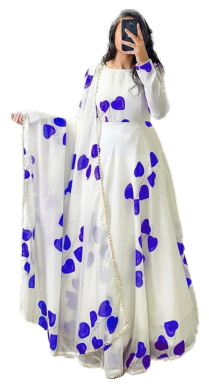

In [15]:
# Displaying the 1st image 
from PIL import Image

# function to load and display an image
def display_image(filepath):
    image = Image.open(filepath)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
file_path = os.path.join(extraction_directory_updated, extracted_files_updated[2])
display_image(file_path)

In [17]:
# Now creating a list of all image file paths for further use
import glob
# directory path containing images
image_directory = r'C:\Users\priya\OneDrive\Desktop\Datasets\women-fashion\women fashion'

# list of image paths
image_path = [file for file in glob.glob(os.path.join(image_directory,'*.*',)) if file.endswith(('.jpg','.png','.jpeg','.wepb'))]

In [19]:
image_path[0]

'C:\\Users\\priya\\OneDrive\\Desktop\\Datasets\\women-fashion\\women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg'

In [21]:
# now using the CNN to extract all the features from the images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Model

In [27]:
base_model = VGG16(weights='imagenet',include_top = False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def processing_image_data(img_path):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array,axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model,preprocessed_img):
    features =model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features/np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_images_names = []

for img_path in image_path:
    preprocessed_img = processing_image_data(img_path)
    features = extract_features(model,preprocessed_img)
    all_features.append(features)
    all_images_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━

In [23]:
# using cosine 
from scipy.spatial.distance import cosine
def recommend_fashion_item(image_path,all_features,all_image_names,model,top_n=5):
    # preprocessing the input image and extract the  features
    preprocessed_image = processing_image_data(image_path)
    input_features = extract_features(model,preprocessed_image)

    # calculating similarities and finding top n images
    similarities = [1-cosine(input_features,other_features) for other_features in all_features ]
    similar_indices = np.argsort(similarities)[-top_n:]
    # filter the image index from all similara indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(image_path)]

    # displaying the input images
    plt.figure(figsize=(15,15))
    plt.subplot(1,top_n+1,1)
    plt.imshow(Image.open(image_path))
    plt.title('Input Image')
    plt.axis('off')

    # displaying similar images
    for i,idx in enumerate(similar_indices[:top_n],start=1):
        image_path = os.path.join( r'C:\Users\priya\OneDrive\Desktop\Datasets\women-fashion\women fashion',all_image_names[idx])
        plt.subplot(1,top_n+1,i+1)
        plt.imshow(Image.open(image_path))
        plt.title(f"recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    

    
    
    

In [25]:
input_image_path = 'C:\\Users\\priya\\OneDrive\\Desktop\\Datasets\\women-fashion\\women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg'
recommend_fashion_item(input_image_path,all_features,image_path,model,top_n=4)

NameError: name 'all_features' is not defined